# Akshitha Ajayan Jupyter In-Class Assignment 2

## Generating Data

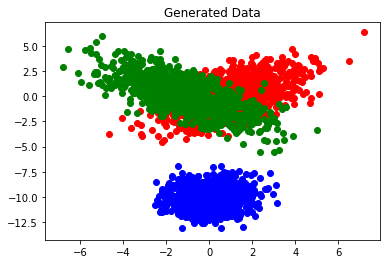

In [80]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math

mu1 = np.transpose(np.array([1,0]))
mu2 = np.transpose(np.array([-1, 0]))
mu3 = np.transpose(np.array([0, -10]))

#print(mu1.shape)
U = np.array([[1/math.sqrt(2), -1/math.sqrt(2)],[1/math.sqrt(2), 1/math.sqrt(2)]])
#print(U)
lambda1 = np.array([[4, 0],[0, 1]])
lambda2 = np.array([[1, 0],[0, 5]])

sigma1 = np.matmul(np.matmul(U, lambda1), np.transpose(U))
sigma2 = np.matmul(np.matmul(U, lambda2), np.transpose(U))
sigma3 = np.eye(2)

x1 = np.random.multivariate_normal(mu1, sigma1, 1000)
x2 = np.random.multivariate_normal(mu2, sigma2, 1000)
x3 = np.random.multivariate_normal(mu3, sigma3, 1000)

plt.scatter(x1[:,0], x1[:,1], c='r')
plt.scatter(x2[:,0], x2[:,1], c='g')
plt.scatter(x3[:,0], x3[:,1], c='b')
plt.title("Generated Data")
plt.show()

## K-Mean Clustering

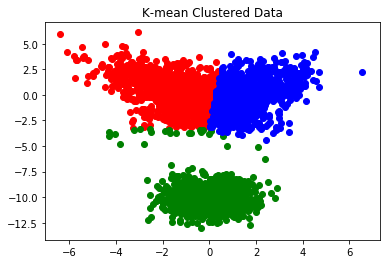

In [79]:
c1 = []
c2 = []
c3 = []

data = np.vstack((x1,x2))
data = np.vstack((data, x3))
np.random.shuffle(data)

for i in range(0, 3000):
    random = np.random.randint(0,3)
    x = data[i,:]
    if(random==0):
        c1.append(x)
    if(random==1):
        c2.append(x)
    if(random==2):
        c3.append(x)

c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

uk = np.zeros((3,2))
flag1 = 1
flag2 = 1
flag3 = 1

while(flag1==1 and flag2==1 and flag3==1):
    uk[0, :] = np.mean(c1, axis=0)
    uk[1, :] = np.mean(c2, axis=0)
    uk[2, :] = np.mean(c3, axis=0)
    
    temp1 = []
    temp2 = []
    temp3 = []
    
    for i in range(len(c1)):
        a = LA.norm(c1[i]-uk[0])
        b = LA.norm(c1[i]-uk[1])
        c = LA.norm(c1[i]-uk[2])
        if(b < c):
            if(b < a):
                temp2.append(c1[i])
                flag1 = 1
            else:
                temp1.append(c1[i])
                flag1 = 0
        else:
            if(c < a):
                temp3.append(c1[i])
                flag1 = 1
            else:
                temp1.append(c1[i])
                flag1 = 0
    
    for i in range(len(c2)):
        a = LA.norm(c2[i]-uk[0])
        b = LA.norm(c2[i]-uk[1])
        c = LA.norm(c2[i]-uk[2])
        if(a < c):
            if(a < b):
                temp1.append(c2[i])
                flag2 = 0
            else:
                temp2.append(c2[i])
                flag2 = 0
        else:
            if(c < b):
                temp3.append(c2[i])
                flag2 = 1
            else:
                temp2.append(c2[i])
                flag2 = 0
    
    for i in range(len(c3)):
        a = LA.norm(c3[i]-uk[0])
        b = LA.norm(c3[i]-uk[1])
        c = LA.norm(c3[i]-uk[2])
        if(a < b):
            if(a < c):
                temp1.append(c3[i])
                flag3 = 1
            else:
                temp3.append(c3[i])
                flag3 = 0
        else:
            if(b < c):
                temp2.append(c3[i])
                flag3 = 1
            else:
                temp3.append(c3[i])
                flag3 = 0
    c1 = np.array(temp1)
    c2 = np.array(temp2)
    c3 = np.array(temp3)

plt.scatter(c1[:,0], c1[:,1], c='r')
plt.scatter(c2[:,0], c2[:,1], c='g')
plt.scatter(c3[:,0], c3[:,1], c='b')
plt.title("K-mean Clustered Data")
plt.show()